In [31]:
import gensim
import csv
import pandas as pd
import seaborn as sns
from collections import Counter

Count how many rows in the tokenized titles and abstracts. 

In [2]:
with open("../clean-data/fine-scale/training-data/titles-abstracts-tokenized.csv") as f:
    n = sum(1 for line in f)

In [3]:
print(n)

495110


Load dictionary and corpus, these were made using a bigram model made with the NSF, NIH and UKRI data. The corpus and dictionary also excluded documents with less than 20 tokens.

In [4]:
dictionary = gensim.corpora.Dictionary.load('../clean-data/fine-scale/training-data/dictionary.dict')
corpus = gensim.corpora.MmCorpus('../clean-data/fine-scale/training-data/corpus.mm')

In [5]:
len(dictionary)

6239

In [6]:
len(corpus)

381908

In [14]:
coherence_scores = pd.read_csv('../results/fine-scale/coherence-scores/training-data/calculated_coherence.csv')

In [17]:
coherence_scores


,Unnamed: 0,Topics,umass
0,0,400,-8.825418
1,1,100,-4.393125
2,2,125,-5.492671
3,3,50,-2.516706
4,4,300,-8.825418


<AxesSubplot:xlabel='Topics', ylabel='umass'>

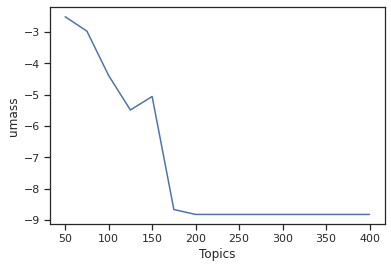

In [19]:
sns.set_theme(style="ticks")

sns.lineplot(x="Topics", y="umass", data =coherence_scores)

In [45]:
lda = gensim.models.ldamulticore.LdaMulticore.load('../results/fine-scale/lda-models/training-model/model_125_topics')

In [46]:
output_array = []
for j in range(lda.num_topics):
    topic_list = [str(i[0]) for i in lda.get_topic_terms(j)]
    topic_list.sort()
    output_array.append("".join(topic_list))

In [47]:
max(Counter(output_array).values())

1

In [48]:
topic_words = [[j[0] for j in lda.show_topic(i,topn = 10)] for i in range(lda.num_topics)]

topic_df = pd.DataFrame(topic_words)

print(topic_df.to_string())

                 0                  1                   2                3                   4                    5                 6                    7                    8                   9
0         fracture             mantle               crack         pressure               earth              mineral               pde                 rock                 slab             mooring
1        equipment        acquisition           shipboard         facility     instrumentation                  mem              item           instrument           laboratory          department
2              reu            student                site       experience              summer              program              week        undergraduate              faculty             project
3            graph               data           reasoning            query            database            analytics       information            secretion       discrimination                user
4           carbon  